In [5]:
import random
import matplotlib.pyplot as plt

def fuzz(k):
    return random.gauss(0,1) * k

def make_data(a, b, n=100, k=0.7):
    x = [random.uniform(-3,3) for _ in range(n)]
    y = [b * xi + a + fuzz(k) for xi in x]
    return x, y

def mean(x):
    return sum(x)/len(x)

def ss(x):
    mx = mean(x)
    return sum([(xi - mx)**2 for xi in x])

def standard_deviation(x):
    ssx = ss(x)
    return (ssx/len(x))**0.5

def correlation(x, y):
    mx, my = mean(x), mean(y)
    ssx, ssy = ss(x), ss(y)
    sscross = sum([(yi - my)*(xi - mx) for xi, yi in zip(x, y)])
    return sscross / (ssx * ssy)**0.5

def linreg(x, y):
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta


estimated params: -5.354923870388411, 3.071294962976467


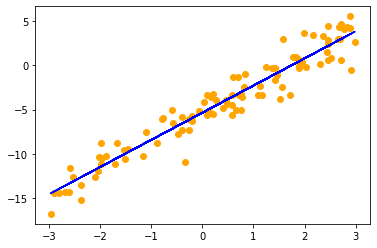

In [7]:
x, y = make_data(-5, 3, k=1.5)
alpha, beta = linreg(x, y)
print(f'estimated params: {alpha}, {beta}')
plt.scatter(x, y, color='orange')
plt.plot(x, [xi * beta + alpha for xi in x], color='blue');